# Crop Recommendation System

In [81]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import time
warnings.filterwarnings('ignore')

In [82]:
# Reading file path
PATH = '/content/Crop_recommendation.csv'
df = pd.read_csv(PATH)

## Exploratory Data Analysis

First we preview the data and we look into the size, shape, columns and labels in the dataset.

In [83]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [85]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [86]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [87]:
df.size

17600

In [88]:
df.shape

(2200, 8)

In [89]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [90]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [91]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [92]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

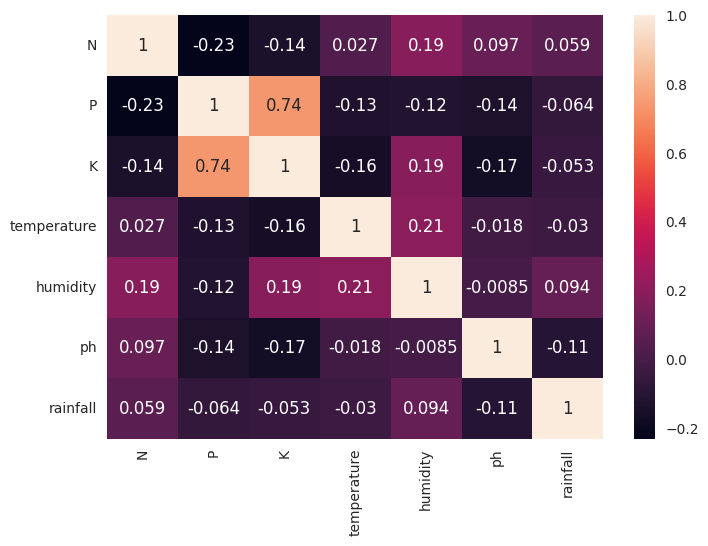

In [93]:
# we use the heatmap to check for multicollinearity
sns.heatmap(df.corr(),annot=True)

In [94]:
#separating the features and the label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

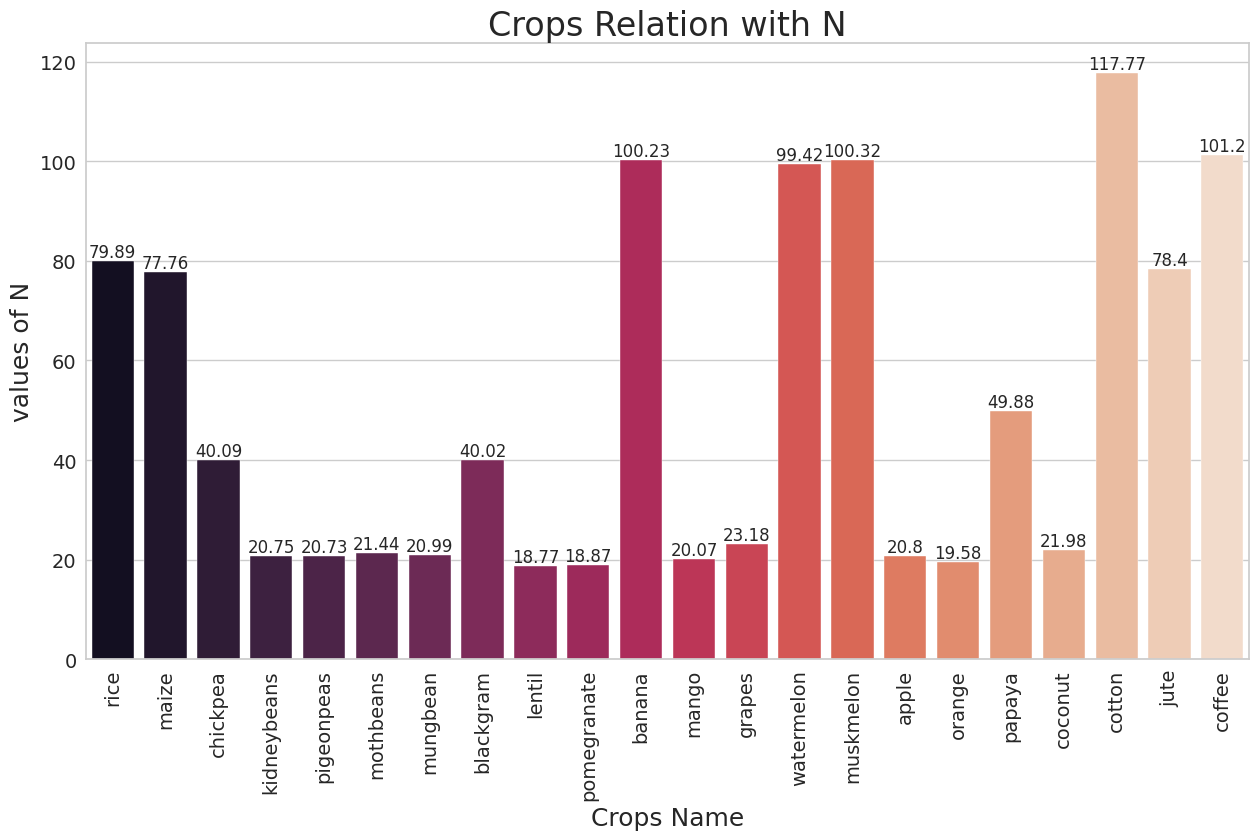

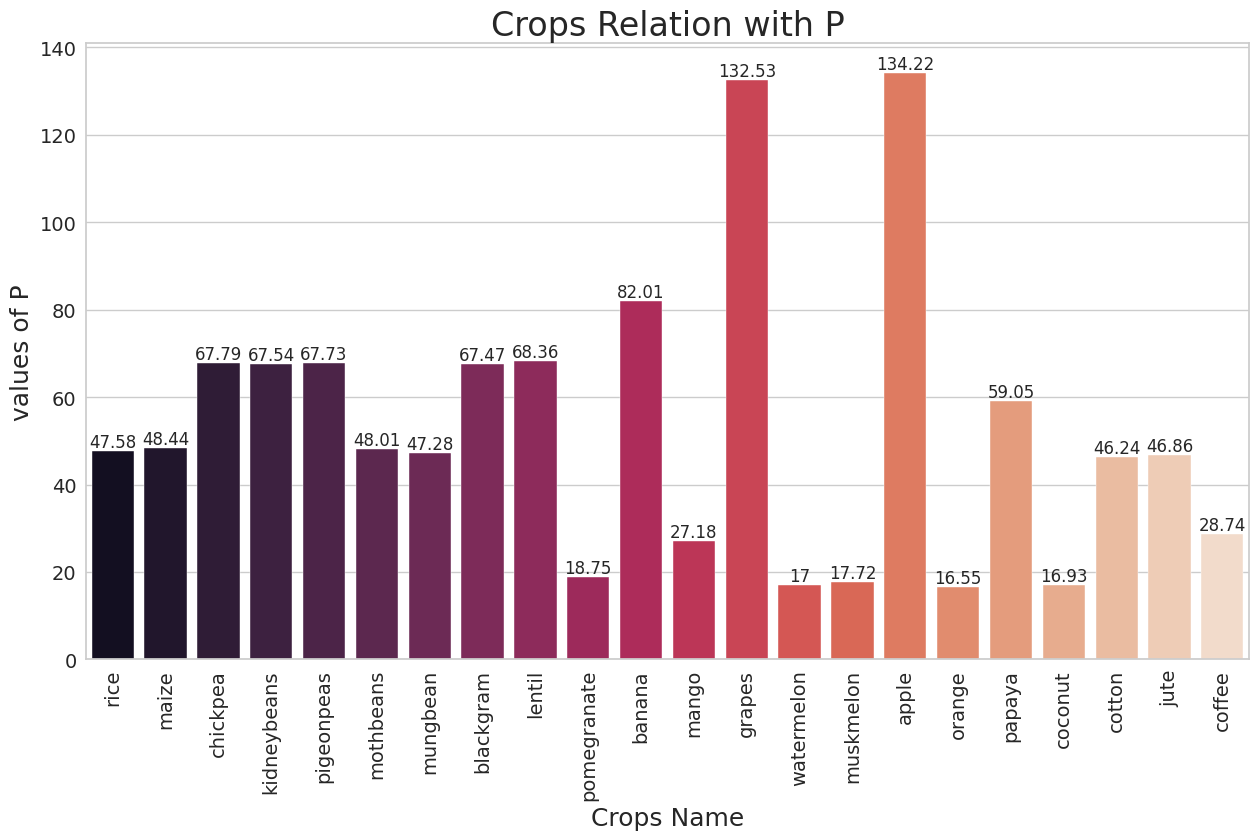

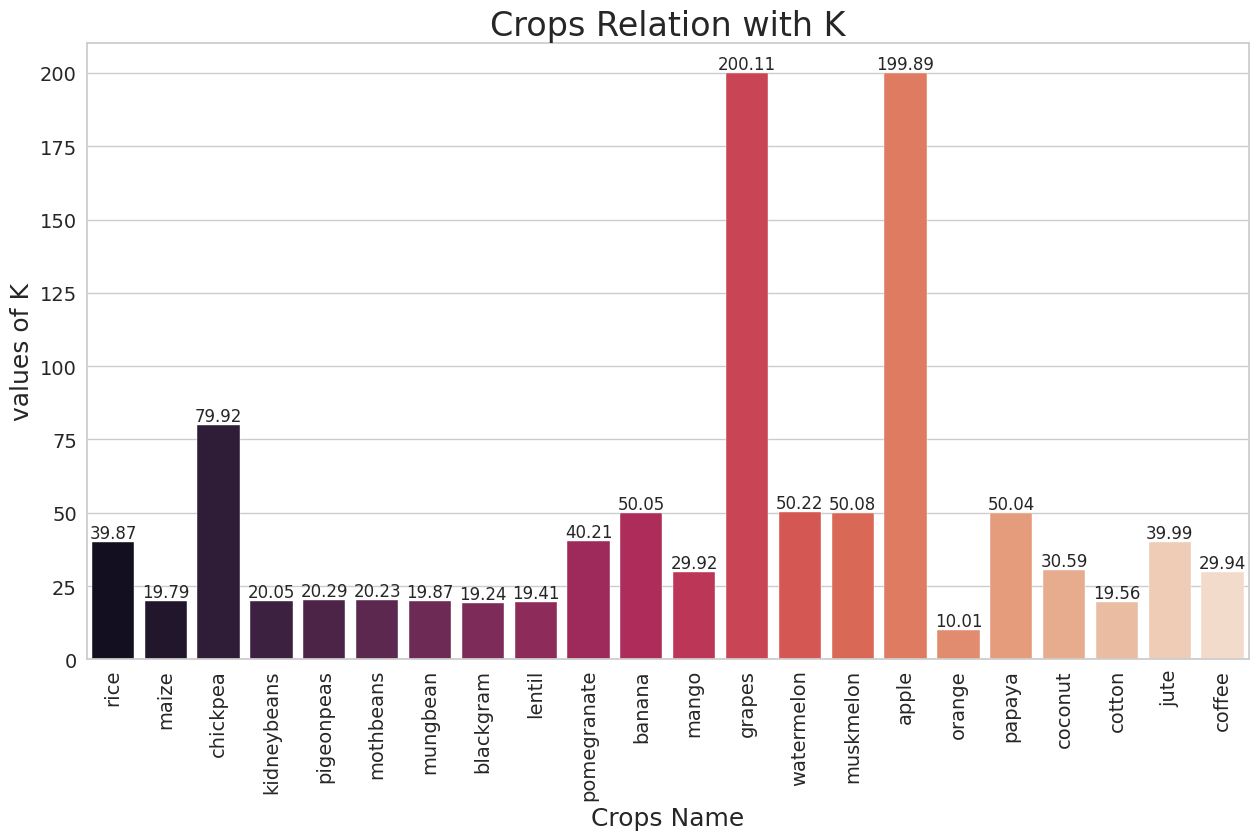

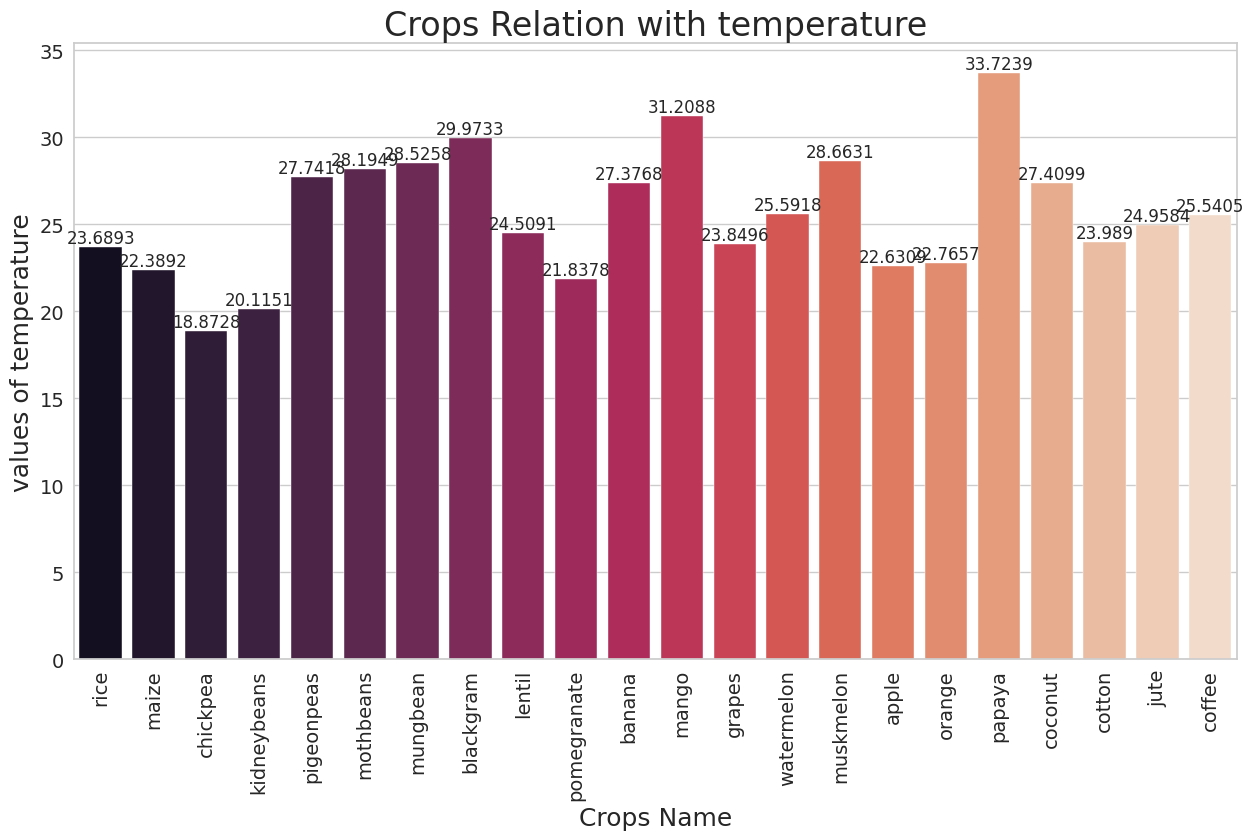

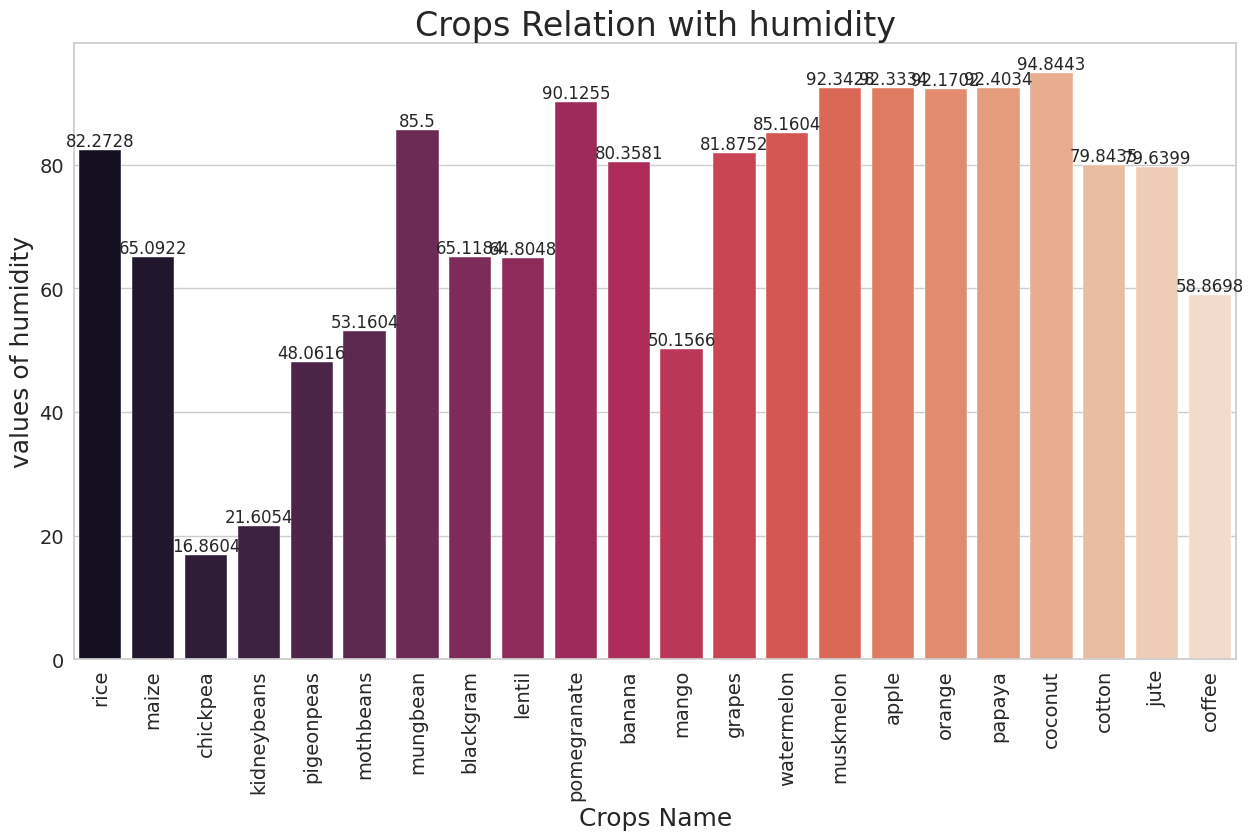

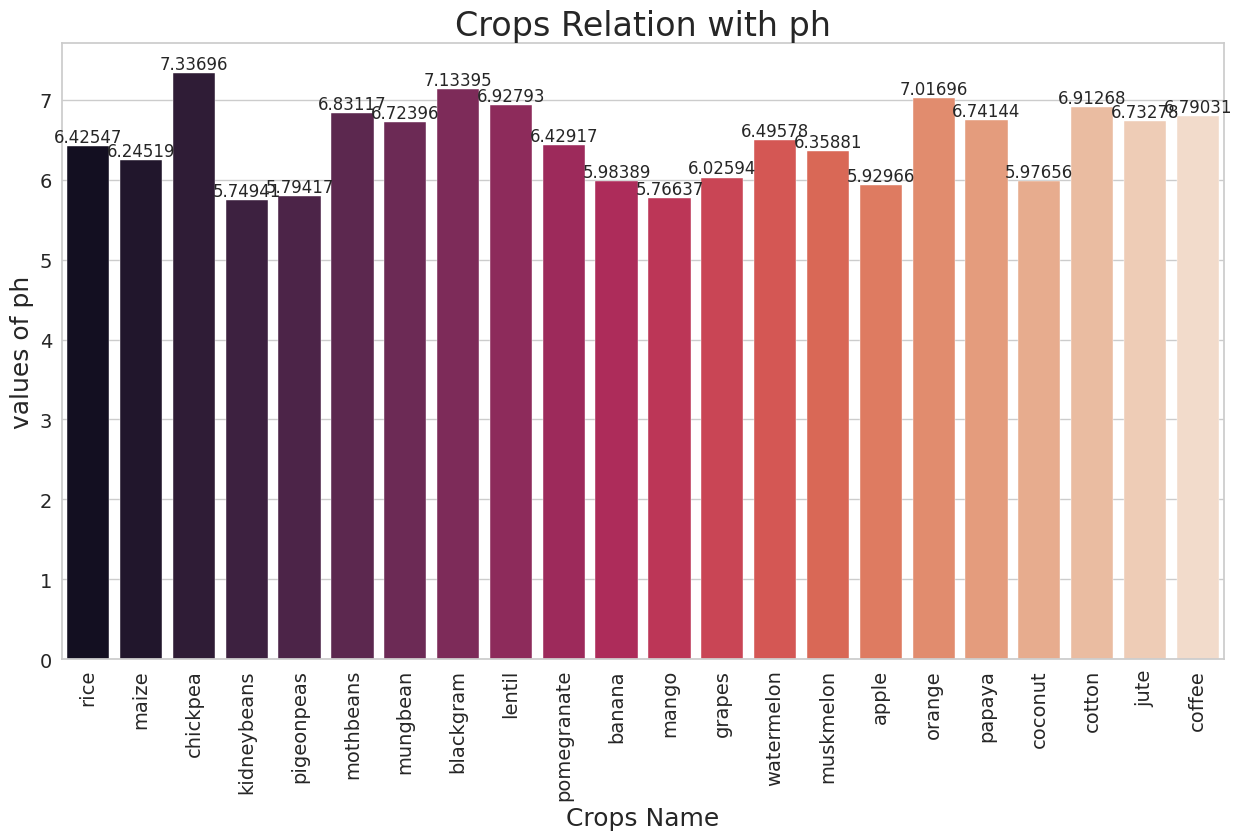

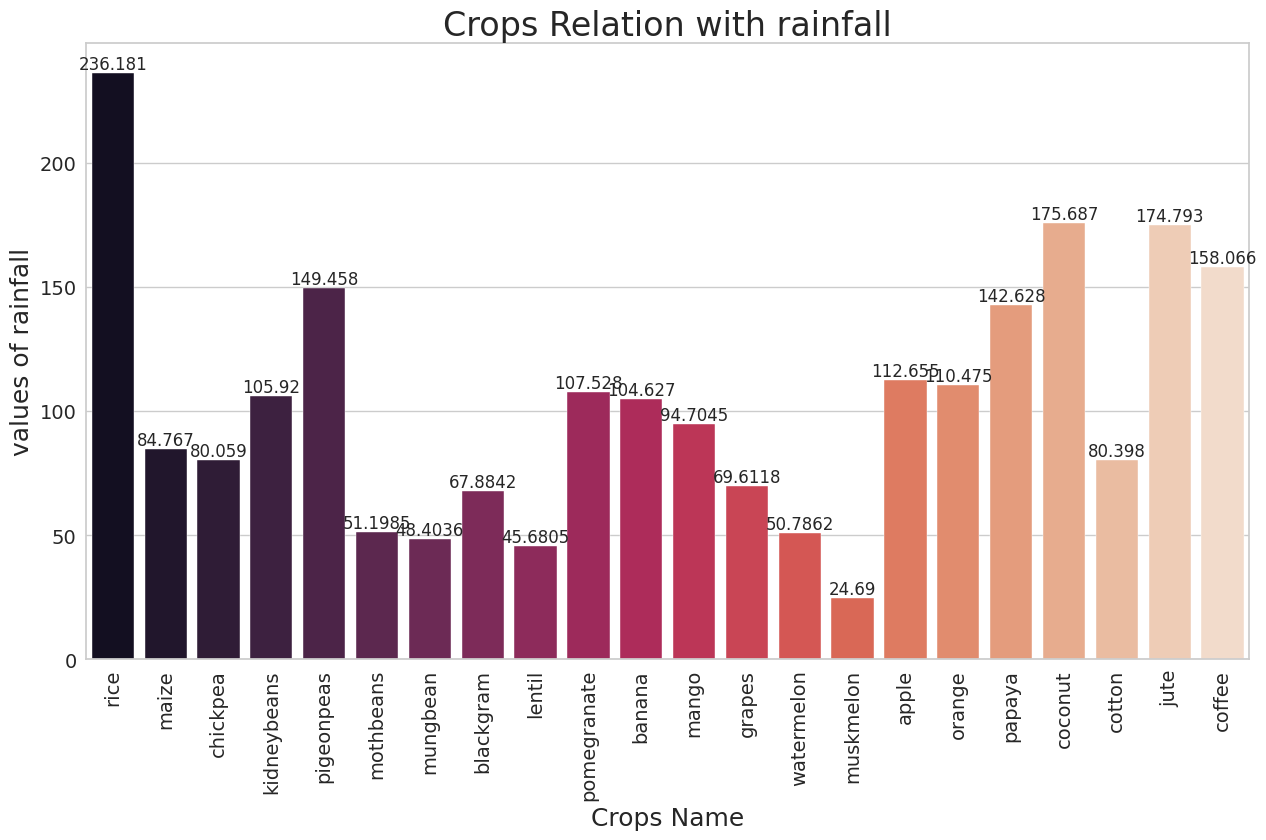

In [95]:
#bar plot to monitor the value of the labels against each feature
def crop_relation_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))

    ax = sns.barplot(x=labels, y=yfeature, data=df, ci=None,palette='rocket')
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("Crops Name", fontsize = 18)
    plt.ylabel("values of " + str(yfeature), fontsize = 18)

for x in features:
    crop_relation_visual(x)

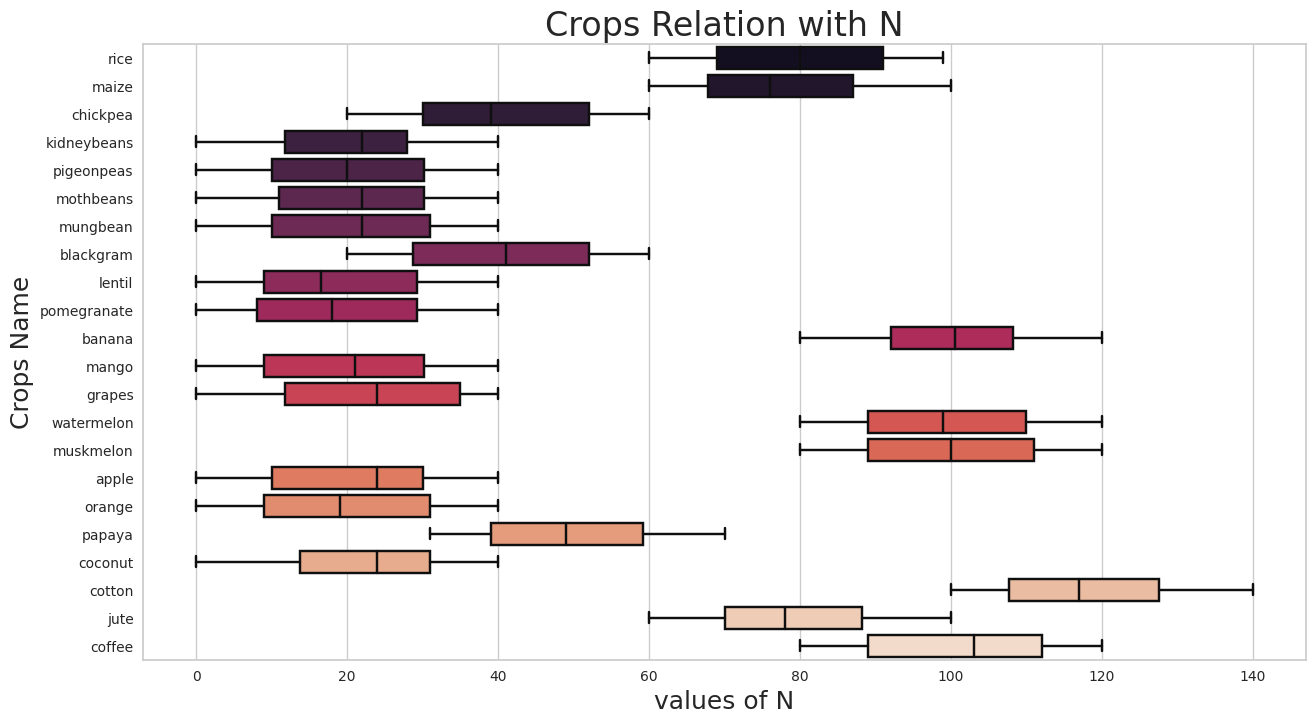

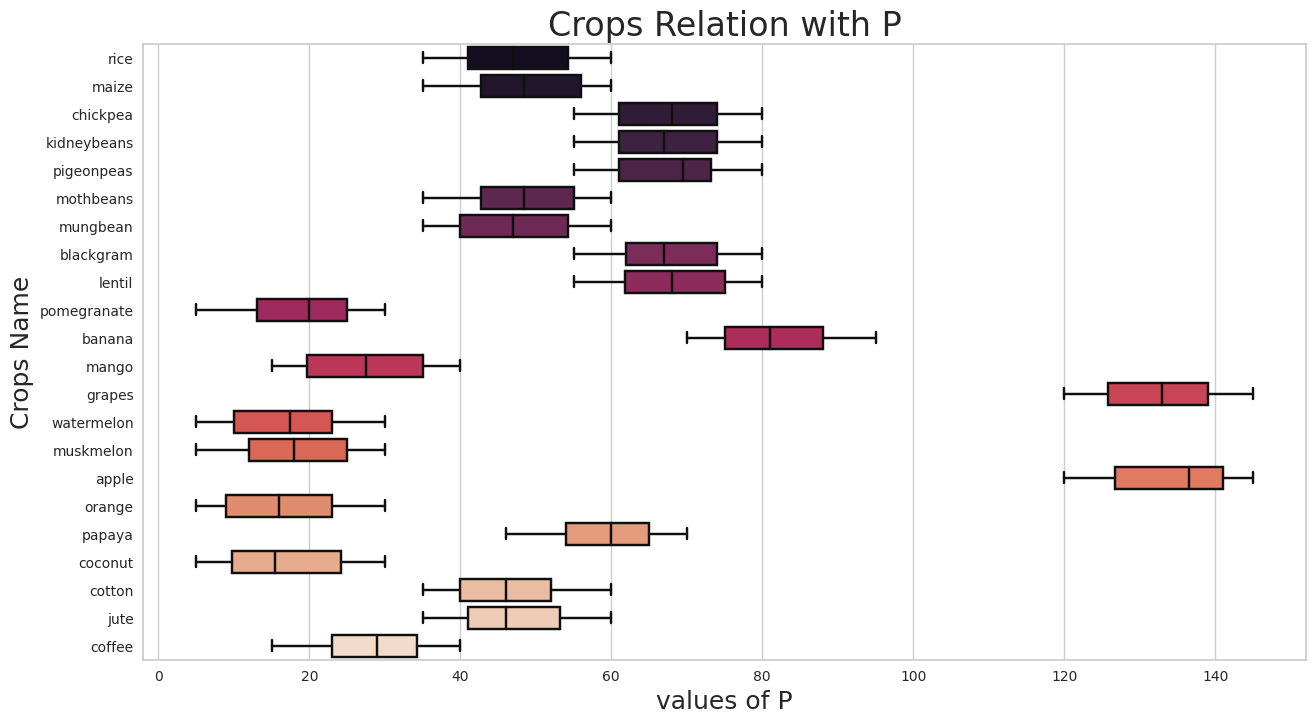

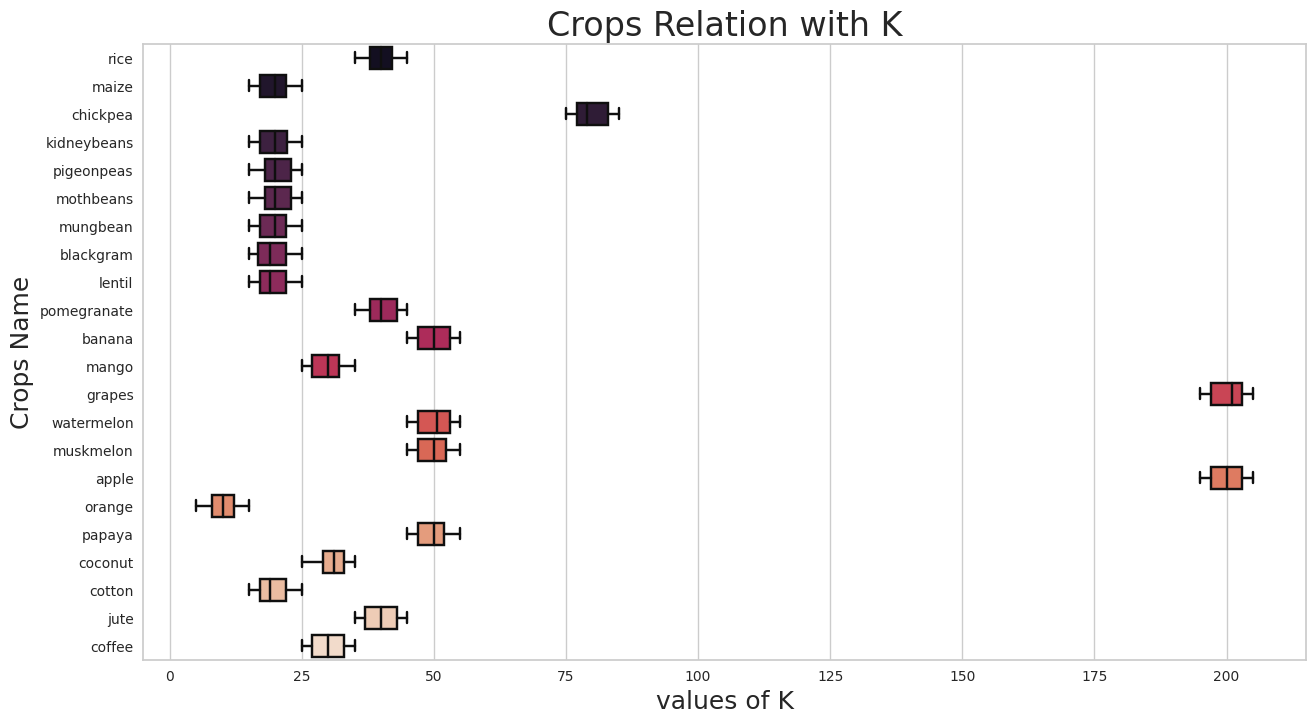

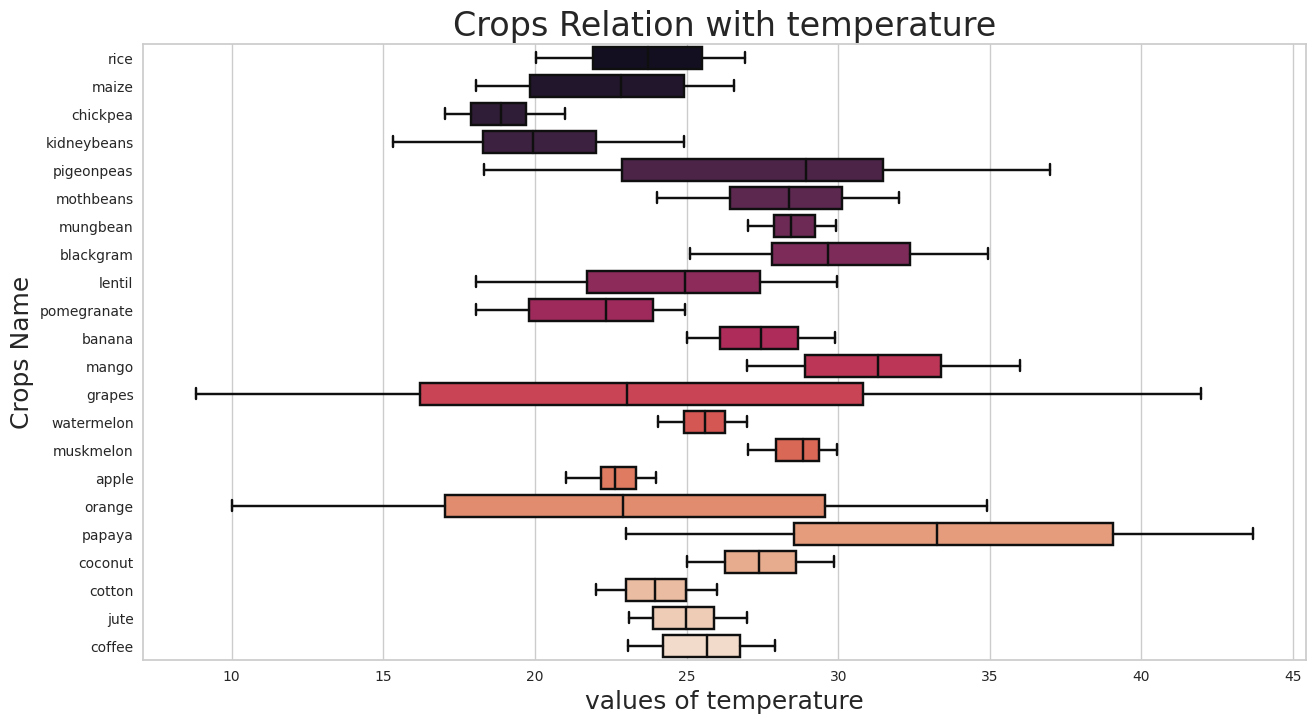

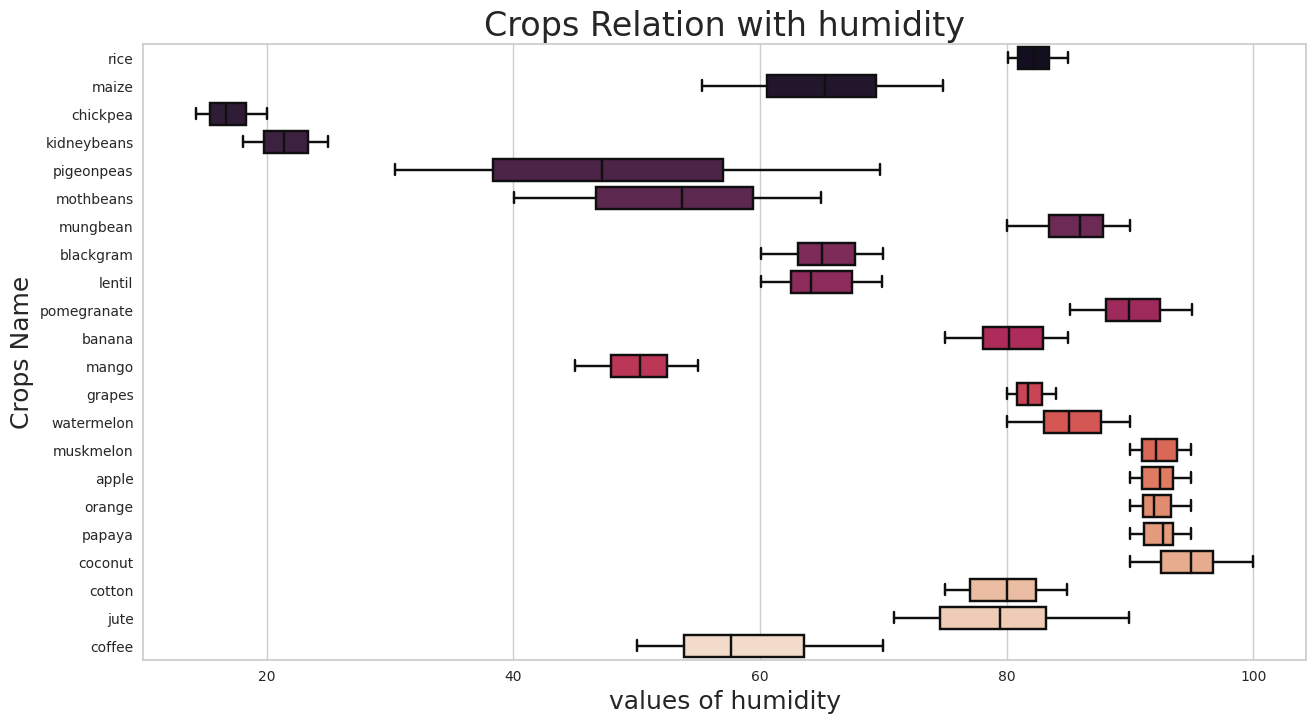

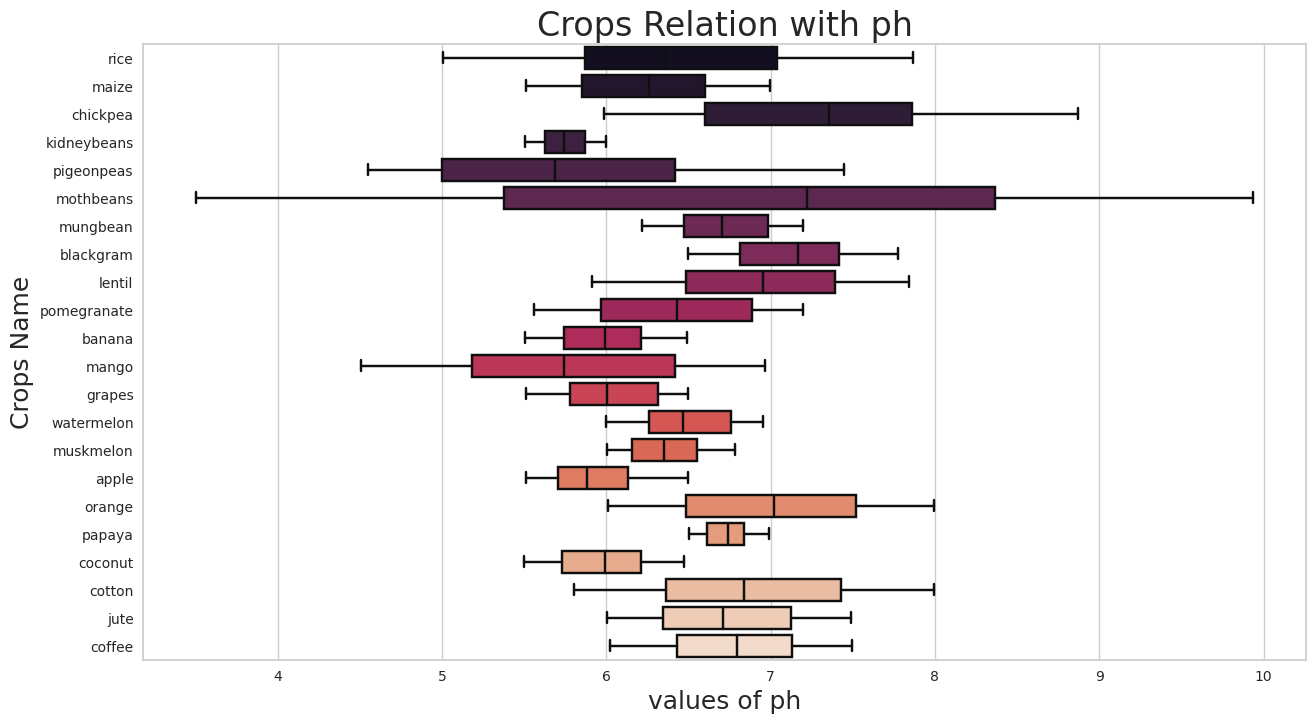

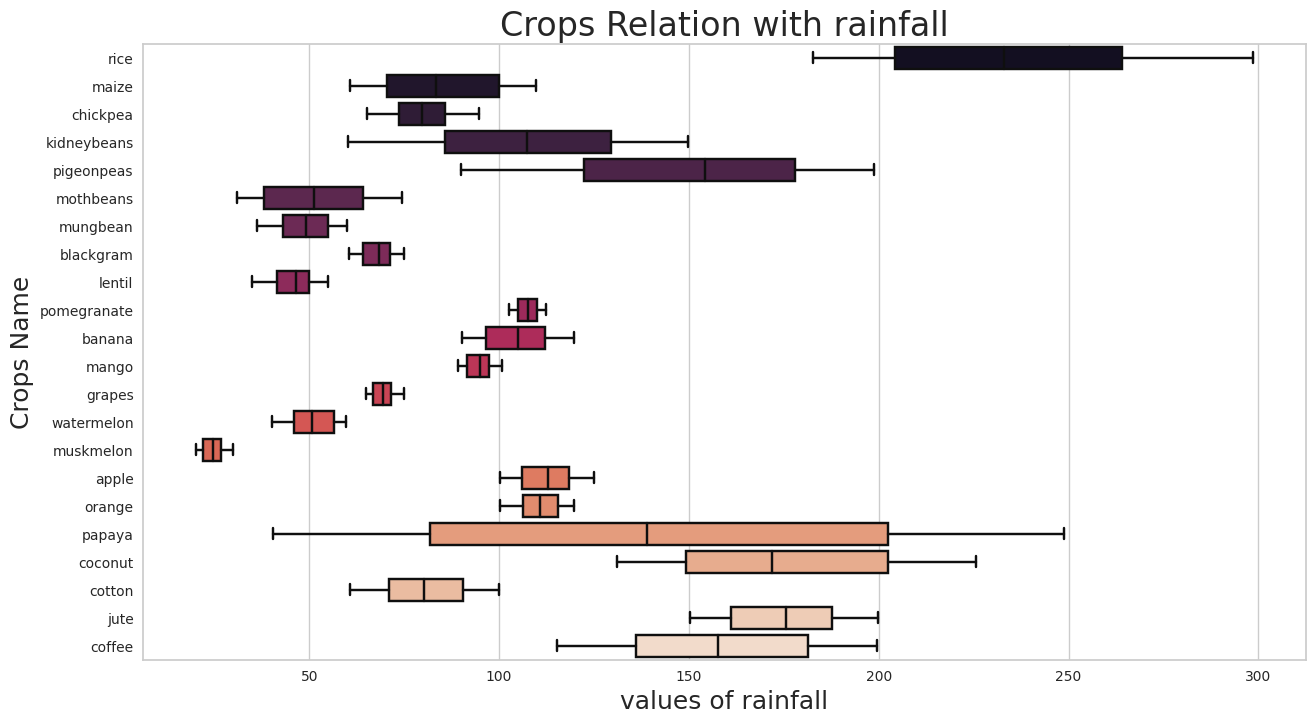

In [96]:
#box plot to monitor the range of the labels against each feature
def crop_boxplot_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))
    sns.boxplot(x=yfeature, y=labels, data=df,palette='rocket')

    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("values of " + str(yfeature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

for x in features:
    crop_boxplot_visual(x)

After the data preprocessing we notice the following about the data:


*   There are no null values
*   Multicollinearity amongst the features is not high
*   There is no strong evidence of outlier presence
*   The distribution of the data is balanced for the labels

Hence, we can go forward with the modelling phase since there are no problems with the data that would require preprocessing.



In [97]:
# Initializing empty lists to append all model's name and corresponding accuracy to monitor their performance
acc = []
model = []
tt = []

In [98]:
# Splitting into train and test data with 80% of the data as training data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Model Training

We will compare the performance of various models for our given dataset to select a suitable one. Since we are performing a classification task here the models selected for this problem are:
*   Decision Tree
*Naive Bayes
*Random Forest
*Gradient Boosting

These algorithms have been selected since they are popularly used for tasks which require multiclass classification.

# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

start = time.time()
DecisionTree.fit(Xtrain,Ytrain)
stop = time.time()
tt.append((stop - start))

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [100]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# Guassian Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

start = time.time()
NaiveBayes.fit(Xtrain,Ytrain)
stop = time.time()
tt.append((stop - start))

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [102]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
start = time.time()
RF.fit(Xtrain,Ytrain)
stop = time.time()
tt.append((stop - start))

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [104]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
start = time.time()
grad.fit(Xtrain,Ytrain)
stop = time.time()
tt.append((stop - start))

predicted_values = grad.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('GB')
print("GB's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

GB's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [106]:
# Cross validation score (Gradient Boosting)
score = cross_val_score(grad,features,target,cv=5)
score

array([0.99090909, 0.98863636, 0.99318182, 0.99772727, 0.98636364])

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

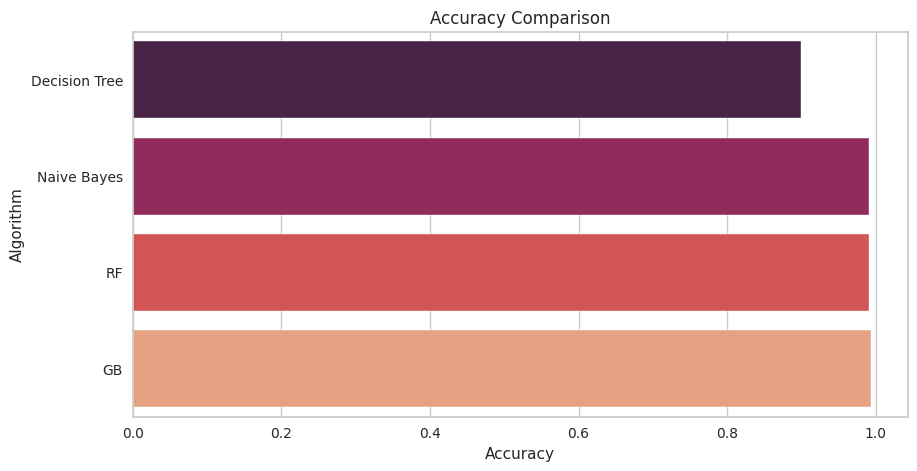

In [107]:
#bar plot to compare the accuracy of all the models
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='rocket')

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Training Time', ylabel='Algorithm'>

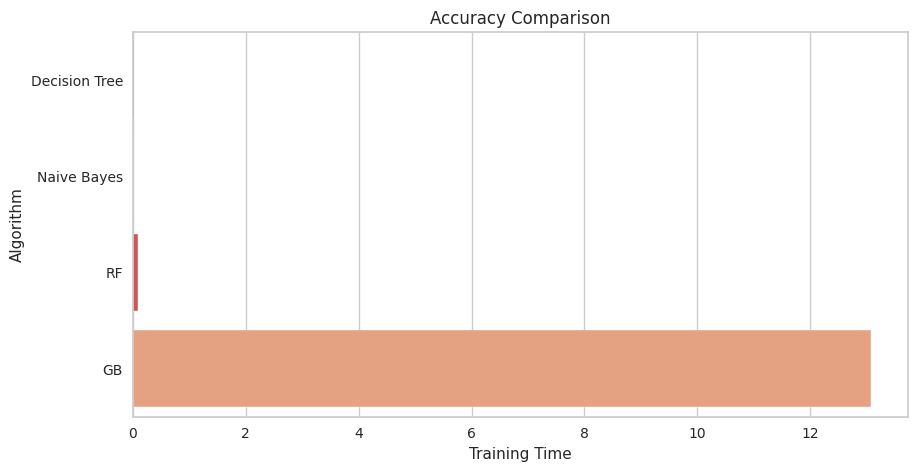

In [108]:
#bar plot to compare the training time of all the models
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Time Comparison')
plt.xlabel('Training Time')
plt.ylabel('Algorithm')
sns.barplot(x = tt,y = model,palette='rocket')

In [109]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
RF --> 0.990909090909091
GB --> 0.9931818181818182


After the comparison of the accuracy and the time we can see that the accuracy given by Gradient Boosting algorithm is higher than the other three but the training time taken by it is comparatively higher as well. Hence we can conclude that for this model choosing Naive Bayes or Random Forest as suitable model is fine since the time trade off can be justified.